<a href="https://colab.research.google.com/github/SnayderZ/Red_Neuronal_mnist/blob/main/Red_Neuronal_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Red Neuronal con MNIST
Autor: Snayder Zuñiga  
Fecha: 24/09/2025  

Este proyecto entrena una red neuronal para reconocer dígitos escritos a mano (dataset MNIST).


# 1. Importar librerías

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

# 2. Cargar dataset MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Definir el modelo

In [79]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28)),  # define la forma de entrada aquí
    Flatten(),               # ya no necesita input_shape
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 4. Compilar y entrenar

In [80]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8728 - loss: 0.4564 - val_accuracy: 0.9615 - val_loss: 0.1343
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9604 - loss: 0.1330 - val_accuracy: 0.9748 - val_loss: 0.0932
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9754 - loss: 0.0815 - val_accuracy: 0.9748 - val_loss: 0.0919
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9832 - loss: 0.0577 - val_accuracy: 0.9770 - val_loss: 0.0851
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9866 - loss: 0.0453 - val_accuracy: 0.9763 - val_loss: 0.0794


# 5. Evaluación

In [81]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nPrecisión en test: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9758 - loss: 0.0788

Precisión en test: 0.9758


# 6. Graficar precisión

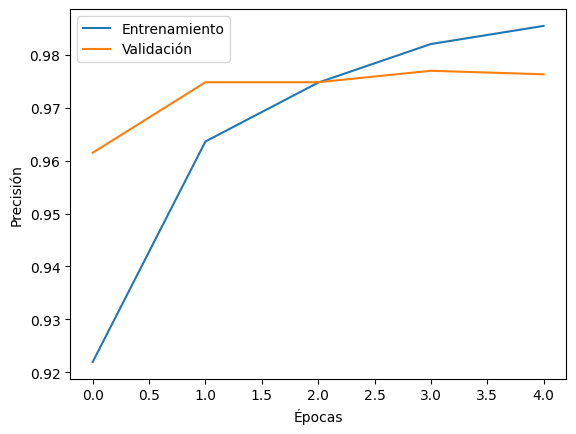

In [82]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# 7. Probar con un ejemplo aleatorio

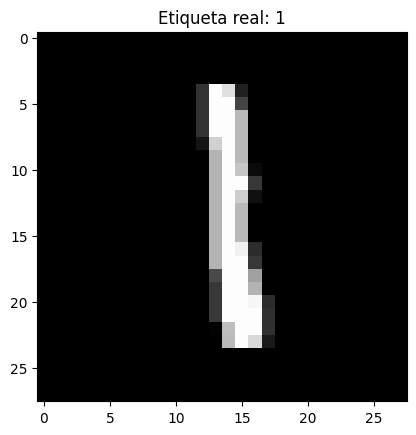

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicción de la red: 1


In [83]:
i = random.randint(0, len(x_test)-1)
plt.imshow(x_test[i], cmap="gray")
plt.title(f"Etiqueta real: {y_test[i]}")
plt.show()

img = np.expand_dims(x_test[i], axis=0)
prediccion = model.predict(img)
print("Predicción de la red:", np.argmax(prediccion))